In [666]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy
from sklearn.linear_model import LinearRegression

### 1. Obtener las medidas de tendencia central para estatura y talla de calzado

##### Esto se puede hacer con la librería de Pandas

In [619]:
df=pd.read_excel("AnalisisDatos.xlsx",dtype=object)
df.drop('Marca temporal', axis=1, inplace=True) #Se elimina la marca temporal
df.drop(index=49,inplace=True) #Se elimina el dato no numérico
df.shape #Cuantas filas y columnas hay 

(199, 3)

In [620]:
df.head()

,¿Cuál es su estatura en centímetros?,¿Cuál es su talla de calzado?,Sexo
0,169,27.5,Masculino
1,175,26,Masculino
2,173,27,Masculino
3,173,27,Femenino
4,175,26,Masculino


In [621]:
df.dtypes #Se checa el tipo de cada columna

¿Cuál es su estatura en centímetros?    object
¿Cuál es su talla de calzado?           object
Sexo                                    object
dtype: object

In [622]:
#Se renombran las columnas
df.rename(columns = {'¿Cuál es su estatura en centímetros?':'Estatura', '¿Cuál es su talla de calzado?':'Talla_Calzado'}, inplace = True)
df.head()

,Estatura,Talla_Calzado,Sexo
0,169,27.5,Masculino
1,175,26,Masculino
2,173,27,Masculino
3,173,27,Femenino
4,175,26,Masculino


Es necesario reemplazar o eliminar ciertos datos para sacar las medidas de tendencia central

In [623]:
df["Estatura"]=df["Estatura"].astype(str) #Se convierte a string
df['Estatura']=df['Estatura'].str.strip(' cms') #Se quitan todos los caracteres no numéricos
df['Estatura']=df['Estatura'].str.replace(',','')
df['Estatura']=df['Estatura'].apply(lambda a: str("%.2f" % round(float(a),2)).replace(".","")[0:3] if float(a)<2.0 else a)
df["Estatura"]=df["Estatura"].astype('float64') #Se regresa a float
df["Talla_Calzado"]=df["Talla_Calzado"].astype('float64')
df.dropna() #Se borran filas vacías o inválidos
df.dtypes #Se checa que todo quede en el tipo adecuado

Estatura         float64
Talla_Calzado    float64
Sexo              object
dtype: object

In [624]:
df.head()

,Estatura,Talla_Calzado,Sexo
0,169.0,27.5,Masculino
1,175.0,26.0,Masculino
2,173.0,27.0,Masculino
3,173.0,27.0,Femenino
4,175.0,26.0,Masculino


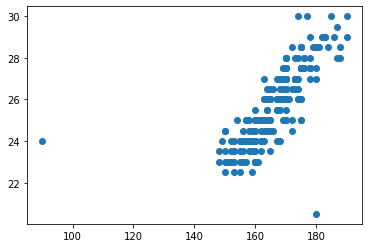

In [625]:
plt.scatter(x=df[["Estatura"]],y=df[["Talla_Calzado"]])
plt.show()

Vemos que hay dos datos muy alejados de los demás valores, por lo que se eliminan para un mejor análisis

In [626]:
df.drop(index=[25,178],inplace=True)

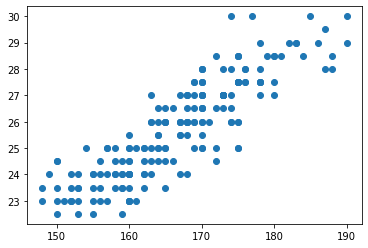

In [627]:
plt.scatter(x=df[["Estatura"]],y=df[["Talla_Calzado"]])
plt.show()

In [690]:
df.shape

(197, 3)

Ahora si se obtienen las medidas de tendencia central

In [628]:
df.describe()

,Estatura,Talla_Calzado
count,197.000000,197.000000
mean,166.868020,25.794416
std,9.341745,1.874811
min,148.000000,22.500000
25%,160.000000,24.000000
50%,168.000000,26.000000
75%,173.000000,27.000000
max,190.000000,30.000000


### 2. Encontrar la función gaussiana que mejor ajuste a las curvas asumiendo una distribución normal

In [633]:
miu_Est=df["Estatura"].mean()
miu_Talla=df["Talla_Calzado"].mean()
sigma_Est=df["Estatura"].std()
sigma_Talla=df["Talla_Calzado"].std()
print([miu_Est,sigma_Est,miu_Talla,sigma_Talla])

[166.86802030456852, 9.341745381624133, 25.794416243654823, 1.8748113617598379]


### 3. Graficar histogramas y funciones gaussianas

In [634]:
def func(sigma,miu,x):
  y=1/(np.sqrt(2*np.pi)*sigma)*np.exp(-(x-miu)**2/(2*sigma**2))
  return y

In [655]:
X_Est=np.linspace(130,200,num=200)
X_Talla=np.linspace(20,32,num=200)
Y_Est=func(sigma_Est,miu_Est,X_Est)
Y_Talla=func(sigma_Talla,miu_Talla,X_Talla)

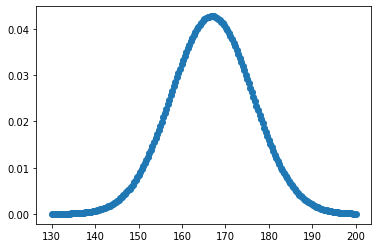

In [653]:
plt.scatter(x=X_Est,y=Y_Est)
plt.show()

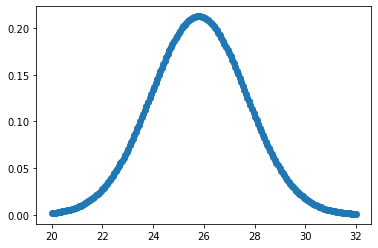

In [656]:
plt.scatter(x=X_Talla,y=Y_Talla)
plt.show()

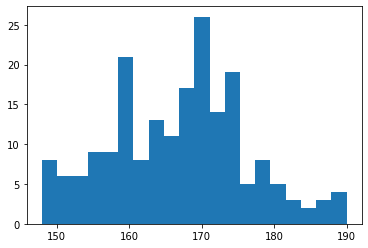

In [663]:
plt.hist(df["Estatura"], range=(df["Estatura"].min(),df["Estatura"].max()), bins = 20, density=False)
plt.show()

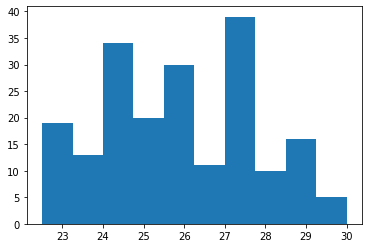

In [665]:
plt.hist(df["Talla_Calzado"], range=(df["Talla_Calzado"].min(),df["Talla_Calzado"].max()), bins = 10, density=False)
plt.show()

### 4. Encontrar la probabilidad de que una persona tomada al azar se encuentre dentro de la primera desviación estándar para cada variable

In [676]:
P_Est=scipy.stats.norm(loc=miu_Est, scale=sigma_Est)
P_Talla=scipy.stats.norm(loc=miu_Talla, scale=sigma_Talla)

print("La probabilidad para la Estatura sería de: ",200*P_Est.cdf(miu_Est+sigma_Est)-100)
print("La probabilidad para la Talla de Calzado sería de: ",200*P_Talla.cdf(miu_Talla+sigma_Talla)-100)

La probabilidad para la Estatura sería de:  68.26894921370851
La probabilidad para la Talla de Calzado sería de:  68.2689492137086


### 5. Hallar una aproximación lineal a la relación entre estatura y talla de calzado. Tanto para la población general como para subgrupos divididos por sexo y comparar

Regresión en general

Text(0, 0.5, 'Talla de Calzado [cm]')

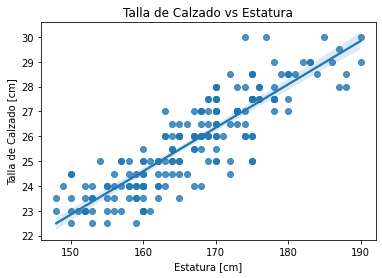

In [629]:
sns.regplot(x="Estatura",y="Talla_Calzado",data=df)
plt.title("Talla de Calzado vs Estatura")
plt.xlabel("Estatura [cm]") 
plt.ylabel("Talla de Calzado [cm]") 

In [630]:
aprox=LinearRegression(fit_intercept=True)
aprox.fit(df[["Estatura"]],df[["Talla_Calzado"]])
print("Talla_Calzado={}*Estatura{}".format(aprox.coef_[0,0].round(4),aprox.intercept_[0].round(4)))

Talla_Calzado=0.1748*Estatura-3.3719


Regresión para cada sexo

In [681]:
df2=df[df["Sexo"]=="Masculino"]
df2

,Estatura,Talla_Calzado,Sexo
0,169.0,27.5,Masculino
1,175.0,26.0,Masculino
2,173.0,27.0,Masculino
4,175.0,26.0,Masculino
8,170.0,28.0,Masculino
...,...,...,...
179,169.0,27.0,Masculino
187,165.0,26.5,Masculino
188,167.0,25.5,Masculino
190,165.0,26.0,Masculino


Text(0, 0.5, 'Talla de Calzado [cm]')

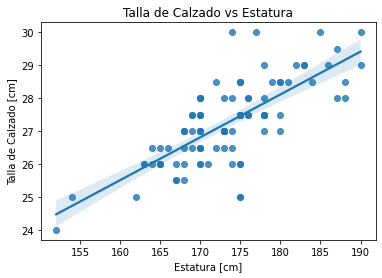

In [683]:
sns.regplot(x="Estatura",y="Talla_Calzado",data=df2)
plt.title("Talla de Calzado vs Estatura")
plt.xlabel("Estatura [cm]") 
plt.ylabel("Talla de Calzado [cm]") 

In [686]:
aprox2=LinearRegression(fit_intercept=True)
aprox2.fit(df2[["Estatura"]],df2[["Talla_Calzado"]])
print("Talla_Calzado={}*Estatura+{}".format(aprox2.coef_[0,0].round(4),aprox2.intercept_[0].round(4)))

Talla_Calzado=0.13*Estatura+4.7133


In [682]:
df3=df[df["Sexo"]=="Femenino"]
df3

,Estatura,Talla_Calzado,Sexo
3,173.0,27.0,Femenino
5,168.0,26.0,Femenino
6,162.0,25.0,Femenino
7,169.0,26.0,Femenino
9,153.0,24.0,Femenino
...,...,...,...
195,161.0,23.0,Femenino
196,160.0,25.0,Femenino
197,167.0,27.0,Femenino
198,163.0,25.0,Femenino


Text(0, 0.5, 'Talla de Calzado [cm]')

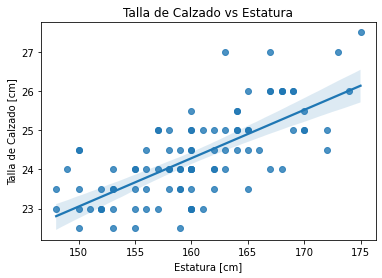

In [684]:
sns.regplot(x="Estatura",y="Talla_Calzado",data=df3)
plt.title("Talla de Calzado vs Estatura")
plt.xlabel("Estatura [cm]") 
plt.ylabel("Talla de Calzado [cm]") 

In [688]:
aprox3=LinearRegression(fit_intercept=True)
aprox3.fit(df3[["Estatura"]],df3[["Talla_Calzado"]])
print("Talla_Calzado={}*Estatura+{}".format(aprox3.coef_[0,0].round(4),aprox3.intercept_[0].round(4)))

Talla_Calzado=0.1233*Estatura+4.5627
